# Figure 2

In [1]:
# Import packages.
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import scipy
from scipy import stats as stats
# Print version numbers.
print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('scipy', scipy.__version__)
# Intialize my pandas preferences.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

matplotlib 3.5.2
numpy 1.22.3
pandas 1.4.2
scipy 1.8.0


In [2]:
# Load the dataframe for figure 2.
vntr_df = pd.read_csv('./data/tgp_muc19_short_read_vntr_cnv.csv.gz')

In [3]:
# Convert the vntr dataframe to a dictionary.
vntr_info = {col: vntr_df[col].values for col in vntr_df.columns.values}

In [4]:
# Show the outlier threshold.
out_thresh = np.percentile(vntr_info['REPEAT_COPIES'], 95)
print(f'Outlier Threshold: {out_thresh}')

Outlier Threshold: 487.6999999999998


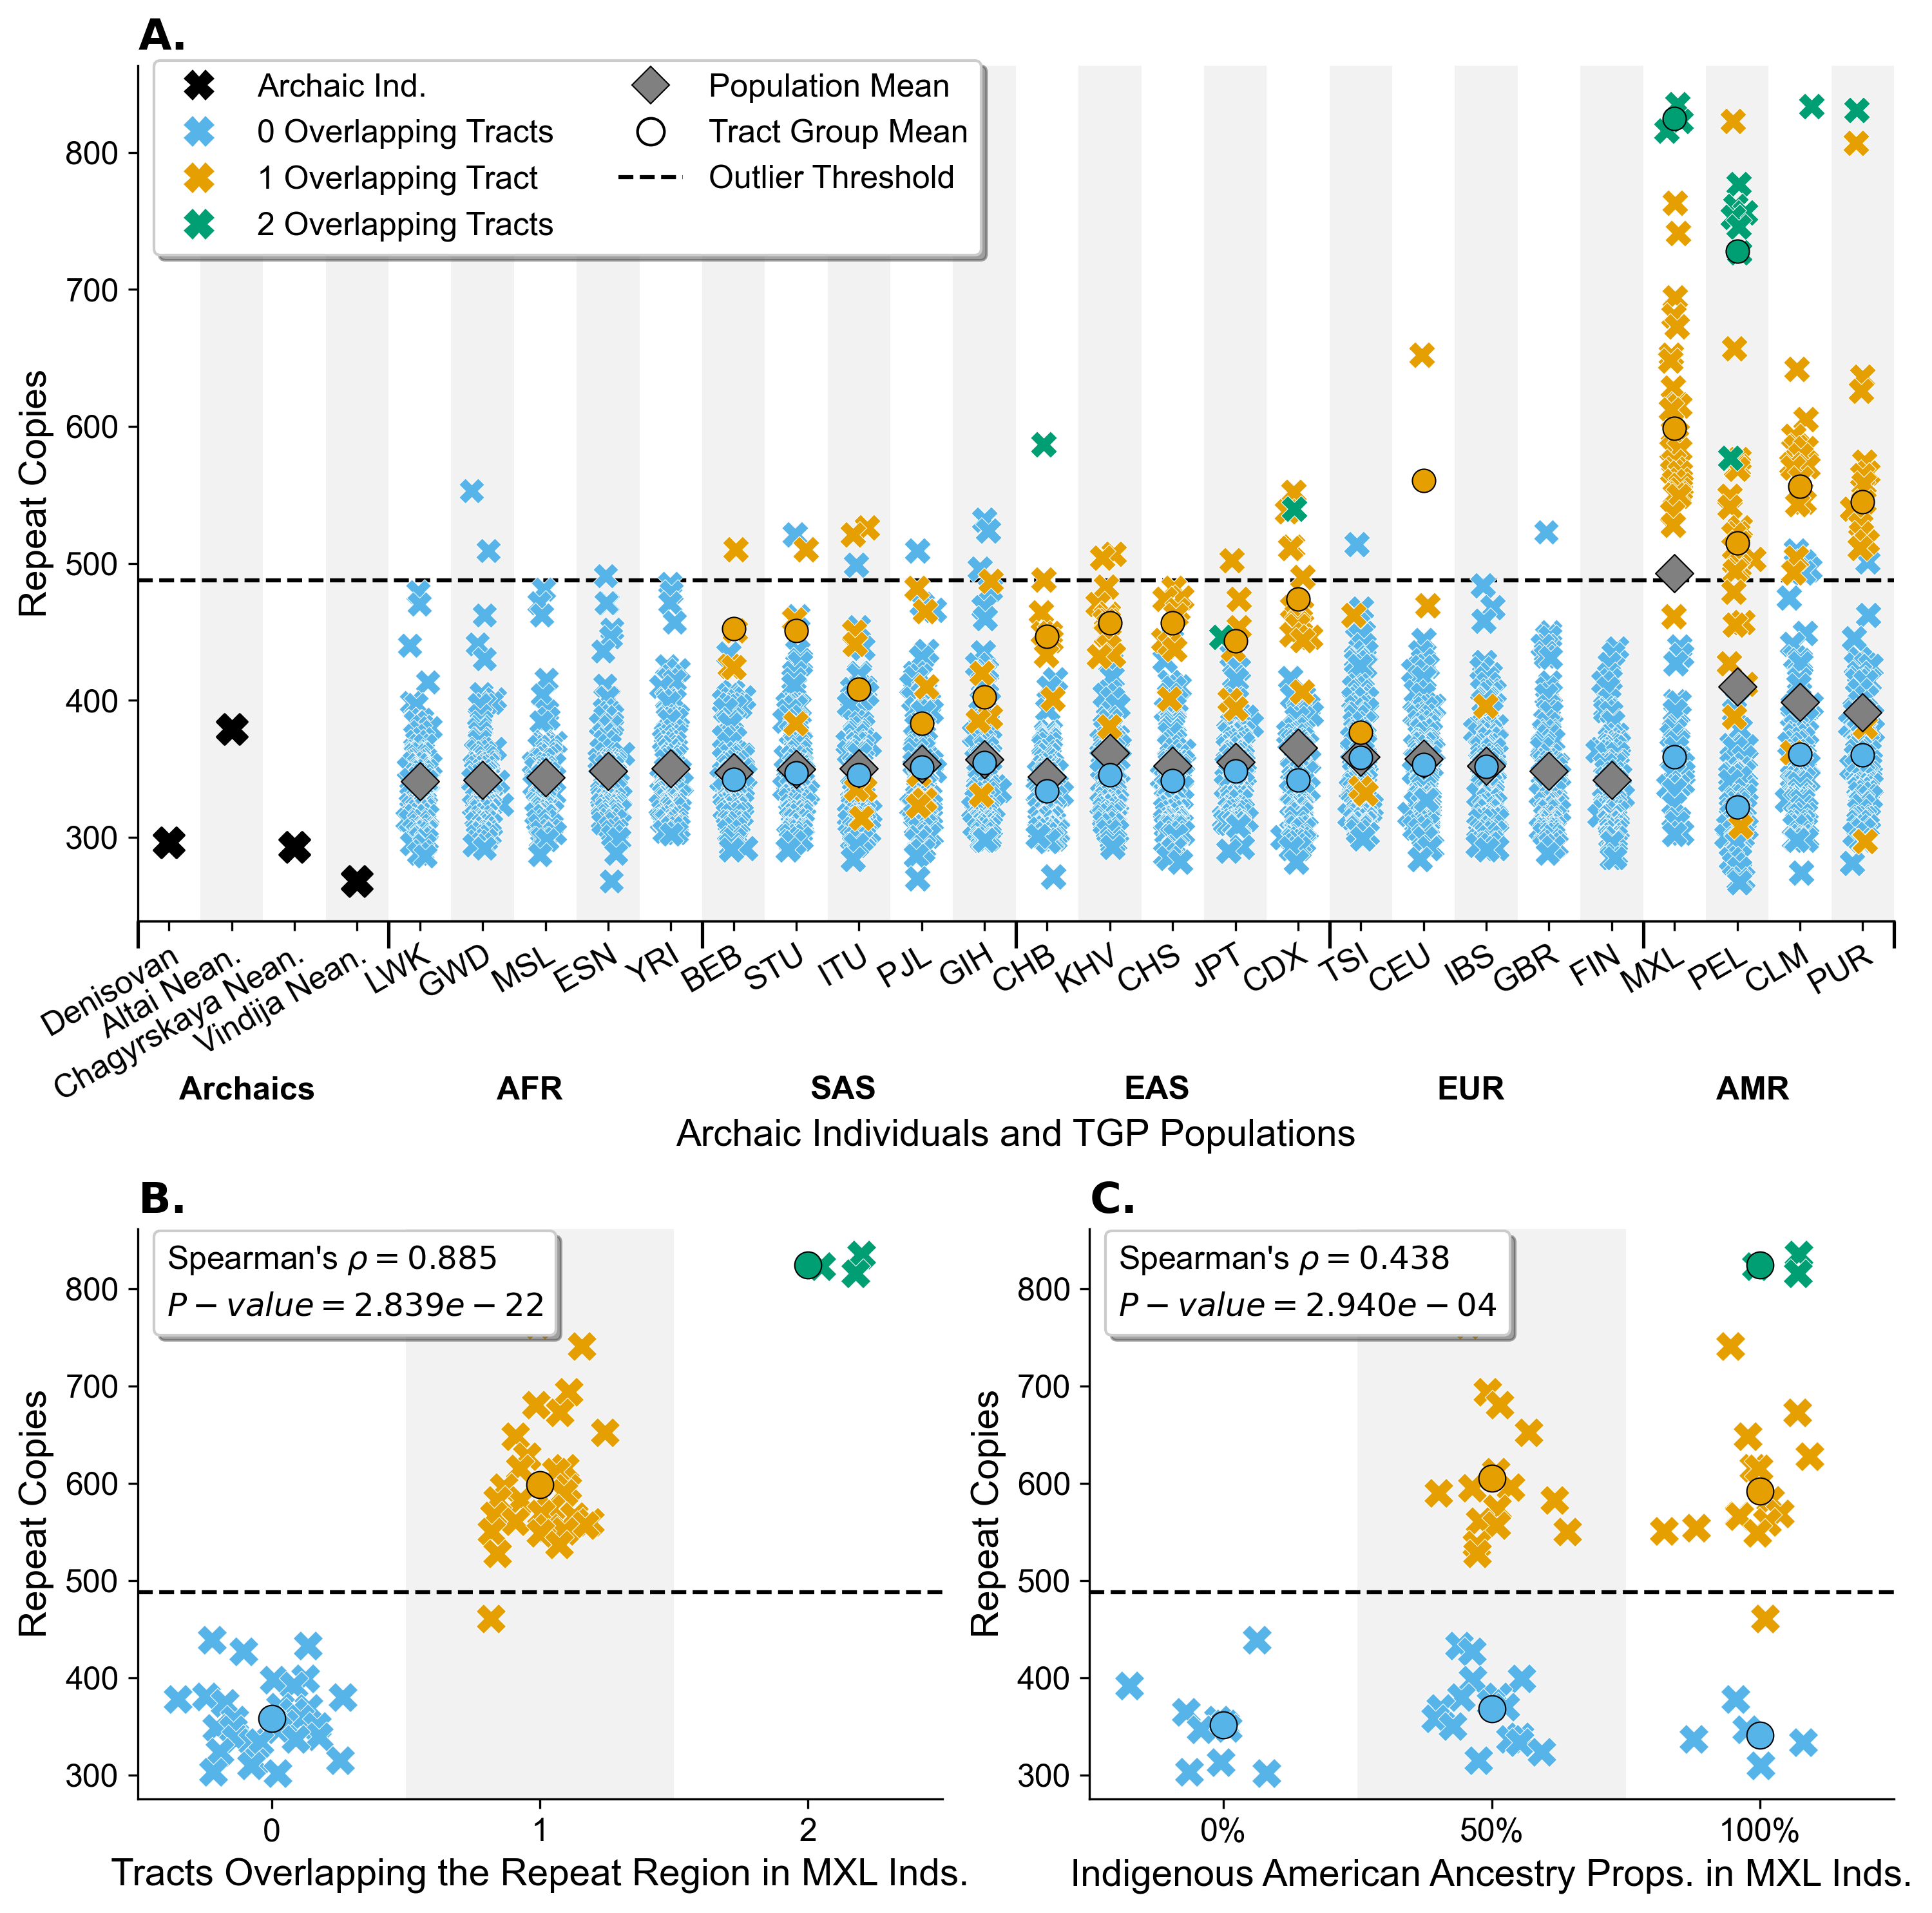

In [5]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
})
# Intialize the figure.
fig = plt.figure(
    figsize=(10, 10), dpi=300,
    facecolor='white',
)
# Intialize the grid.
gs = gridspec.GridSpec(2, 2, height_ratios=[1.5, 1])
# Intialize the axes.
ax1 = plt.subplot(gs[0, :])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
# Set a random seed for consistent jitters.
np.random.seed(2)


###############
### Panel A ###
###############


# Intialize the archaic vntr information.
arc_list = ['Denisovan', 'Altai Nean.', 'Chagyrskaya Nean.', 'Vindija Nean.']
arc_repeats = [296, 379, 293, 268] # DEN, ALT, CHA, VIN
# Intialize an ordered population list.
pop_list = [
    'LWK', 'GWD', 'MSL', 'ESN', 'YRI', # AFR.
    'BEB', 'STU', 'ITU', 'PJL', 'GIH', # SAS.
    'CHB', 'KHV', 'CHS', 'JPT', 'CDX', # EAS.    
    'TSI', 'CEU', 'IBS', 'GBR', 'FIN', # EUR.
    'MXL', 'PEL', 'CLM', 'PUR', # AMR.
]
# Intialize masks for the number of tracts.
is_n_tracts = {n: vntr_info['N_SR_TRACTS'] == n for n in range(3)}
# Intialize the x-axis labels.
vntr_xlabs = np.array(arc_list + pop_list)
# Generate the label positions.
vntr_xlab_pos = np.arange(vntr_xlabs.size)
# For every other x-axis label.
for loc in np.arange(1, vntr_xlabs.size, 2):
    # Plot the alternating background.
    ax1.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.05)
# Plot the archaic repeat copies.
ax1.scatter(vntr_xlab_pos[:4], arc_repeats, color='black',marker='X', s=125)
# For every population.
for i, pop in enumerate(pop_list):
    # Create the poulation mask.
    is_pop = vntr_info['POP'] == pop
    # Extract the population's repeat copy distribution.
    pop_repeats = vntr_info['REPEAT_COPIES'][is_pop]
    # Plot the population mean.
    ax1.scatter(
        vntr_xlab_pos[4:][i], np.mean(pop_repeats), color='grey', zorder=5,
        marker='D', s=100, edgecolor='black', linewidth=0.5,
    )
    # If the population has no introgressed tracts.
    if pop in ['LWK', 'GWD', 'MSL', 'ESN', 'YRI', 'GBR', 'FIN']:
        # Add some jitter to the x-axis.
        jitter = np.random.normal(vntr_xlab_pos[4:][i], 0.075, size=pop_repeats.size)
        # Plot the population's data.
        ax1.scatter(
            jitter, pop_repeats, color='#56B4E9', zorder=4,
            marker='X', s=90, edgecolor='white', linewidths=0.25,
        )
    # Else, the population harbors introgressed tracts.
    else:
        # For each introgressed tract group.
        for grp, color in [(0, '#56B4E9'), (1, '#E69F00'), (2, '#009E73')]:
            # Intialize the group mask for the population.
            is_pop_grp = is_pop & is_n_tracts[grp]
            # If there is at least one individual in the group.
            if is_pop_grp.sum() > 0:
                # Extract the group's repeat copy distribution.
                grp_repeats = vntr_info['REPEAT_COPIES'][is_pop_grp]
                # Add some jitter to the x-axis.
                jitter = np.random.normal(vntr_xlab_pos[4:][i], 0.075, size=grp_repeats.size)
                # Plot the group's data.
                ax1.scatter(
                    jitter, grp_repeats, color=color, zorder=4,
                    marker='X', s=100, edgecolor='white', linewidths=0.25,
                )
                # If there are at least two individuals in the group.
                if is_pop_grp.sum() > 1:
                    # Plot the group mean.
                     ax1.scatter(
                        vntr_xlab_pos[4:][i], np.mean(grp_repeats), color=color, zorder=5,
                        marker='o', s=75, edgecolor='black', linewidth=0.5,
                    )
# Plot the outlier threshold.
ax1.axhline(out_thresh, 0, 1, color='black', linestyle='dashed', lw=1.5)
# Label the axes.
ax1.set_ylabel('Repeat Copies')
ax1.set_xlabel('Archaic Individuals and TGP Populations')
# Set the x-axis limits, tick positions, and labels.
ax1.set_xlim(-0.5, vntr_xlabs.size - 0.5)
ax1.set_xticks(vntr_xlab_pos)
ax1.set_xticklabels(
    vntr_xlabs, rotation=30,
    ha='right', rotation_mode='anchor',
)
# Add secondary x-axes for grouping by super population.
sec_xaxis_1 = ax1.secondary_xaxis('bottom')
sec_xaxis_2 = ax1.secondary_xaxis('bottom')
# Group the populations by super populations.
sec_xaxis_1.set_xticks([1.25, 5.75, 10.75, 15.75, 20.75, 25.25])
sec_xaxis_1.set_xticklabels(['\nArchaics', '\nAFR', '\nSAS', '\nEAS', '\nEUR', '\nAMR'], fontweight='bold')
sec_xaxis_1.tick_params(length=0)
sec_xaxis_1.xaxis.set_tick_params(pad=45)
# Plot dividers to separate the super population groups.
sec_xaxis_2.set_xticks([-0.5, 3.5, 8.5, 13.5, 18.5, 23.5, 27.5])
sec_xaxis_2.set_xticklabels([])
sec_xaxis_2.tick_params(length=10, width=1.25)
# Add a legend.
ax1.legend(
    handles=[
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#000000', label='Archaic Ind.'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#56B4E9', label='0 Overlapping Tracts'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#E69F00', label='1 Overlapping Tract'),
        Line2D([0], [0], linestyle='none', marker='X', markersize=10, color='#009E73', label='2 Overlapping Tracts'),
        Line2D([0], [0], linestyle='none', marker='D', markersize=10, markeredgewidth=0.5, color='grey', markeredgecolor='black', label='Population Mean'),
        Line2D([0], [0], linestyle='none', marker='o', markersize=10, color='white', markeredgecolor='black', label='Tract Group Mean'),
        Line2D([0], [0], color='black', linestyle='dashed', label='Outlier Threshold'),
    ],
    loc='upper left', bbox_to_anchor=(0, 1.025), frameon=True, fancybox=True, shadow=True, ncol=2,
)



###############
### Panel B ###
###############

# Intialize a mask for mxl.
is_mxl = vntr_info['POP'] == 'MXL'
# Intialize masks for the number of tracts in mxl.
mxl_is_n_tracts = {n: (vntr_info['N_SR_TRACTS'] == n) & is_mxl for n in range(3)}
# Intialize the x-axis positions.
mxl_tract_pos = np.array([0, 1, 2])
# Run a correlation test.
mxl_tracts_rho, mxl_tracts_pval = stats.spearmanr(
    vntr_info['N_SR_TRACTS'][is_mxl], vntr_info['REPEAT_COPIES'][is_mxl],
)
# Plot the alternating background.
ax2.axvspan(mxl_tract_pos[1]-0.5, mxl_tract_pos[1]+0.5, facecolor='black', alpha=0.05)
# For each introgressed tract group in mxl.
for grp, color in [(0, '#56B4E9'), (1, '#E69F00'), (2, '#009E73')]:
    # Extract the group's repeat copy distribution.
    grp_repeats = vntr_info['REPEAT_COPIES'][mxl_is_n_tracts[grp]]
    # Add some jitter to the x-axis.
    jitter = np.random.normal(mxl_tract_pos[grp], 0.125, size=grp_repeats.size)
    # Plot the group's data.
    ax2.scatter(
        jitter, grp_repeats, color=color, zorder=4,
        marker='X', s=125, edgecolor='white', linewidths=0.25,
    )
    # Plot the group mean.
    ax2.scatter(
        mxl_tract_pos[grp], np.mean(grp_repeats), color=color, zorder=5,
        marker='o', s=100, edgecolor='black', linewidth=0.5,
    )
# Plot the outlier threshold.
ax2.axhline(out_thresh, 0, 1, color='black', linestyle='dashed', lw=1.5)
# Adjust the axes limits.
ax2.set_xlim(mxl_tract_pos[0]-0.5,mxl_tract_pos[-1]+0.5)
# Set the axes labels.
ax2.set_ylabel('Repeat Copies')
ax2.set_xlabel('Tracts Overlapping the Repeat Region in MXL Inds.')
# Set the x-axis tick positions and labels.
ax2.set_xticks(mxl_tract_pos)
ax2.set_xticklabels(mxl_tract_pos.astype(str))
# Add a figure lgend.
ax2.legend(
    handles=[
        Line2D([0], [0], color='none', linestyle='none', label=f"Spearman's $\\rho = {mxl_tracts_rho:.3f}$"),
        Line2D([0], [0], color='none', linestyle='none', label=fr'$P-value = {mxl_tracts_pval:.3e}$')
    ], 
    loc='upper left', bbox_to_anchor=(0, 1.025), handlelength=0, handletextpad=0,
    frameon=True, fancybox=True, shadow=True,
)   



###############
### Panel C ###
###############

# Intialize a mask for mxl.
is_mxl = vntr_info['POP'] == 'MXL'
# Intialize masks for the number of tracts in mxl.
mxl_is_n_tracts = {n: (vntr_info['N_SR_TRACTS'] == n) & is_mxl for n in range(3)}
# Intialize masks for the indegenious american ancestry proportions in mxl.
mxl_is_iaa_props = {prop: (vntr_info['IAA_PROP'] == prop) & is_mxl for prop in [0, 0.5, 1]}
# Intialize the x-axis positions.
mxl_iaa_pos = np.array([0, 1, 2])
# Run a correlation test.
mxl_iaa_rho, mxl_iaa_pval = stats.spearmanr(
    vntr_info['IAA_PROP'][is_mxl], vntr_info['REPEAT_COPIES'][is_mxl],
)
# Plot the alternating background.
ax3.axvspan(mxl_iaa_pos[1]-0.5, mxl_iaa_pos[1]+0.5, facecolor='black', alpha=0.05)
# For every ancestry proportion.
for i, iaa_prop in enumerate(mxl_is_iaa_props):
    # For each introgressed tract group in mxl.
    for grp, color in [(0, '#56B4E9'), (1, '#E69F00'), (2, '#009E73')]:
        # Intialize the mask for the ancestry partition stratified by the group partition.
        mxl_is_iaa_prop_and_n_tracts = mxl_is_n_tracts[grp] & mxl_is_iaa_props[iaa_prop]
        # If there is at least one individual in this group.
        if mxl_is_iaa_prop_and_n_tracts.sum() > 0:
            # Extract the group's repeat copy distribution.
            grp_repeats = vntr_info['REPEAT_COPIES'][mxl_is_iaa_prop_and_n_tracts]
            # Add some jitter to the x-axis.
            jitter = np.random.normal(mxl_iaa_pos[i], 0.125, size=grp_repeats.size)
            # Plot the group's data.
            ax3.scatter(
                jitter, grp_repeats, color=color, zorder=4,
                marker='X', s=125, edgecolor='white', linewidths=0.25,
            )
            # If there are more than one individual for this group.
            if mxl_is_iaa_prop_and_n_tracts.sum() > 1:
                # Plot the group mean.
                ax3.scatter(
                    mxl_iaa_pos[i], np.mean(grp_repeats), color=color, zorder=5,
                    marker='o', s=100, edgecolor='black', linewidth=0.5,
                )
# Plot the outlier threshold.
ax3.axhline(out_thresh, 0, 1, color='black', linestyle='dashed', lw=1.5)
# Adjust the axes limits.
ax3.set_xlim(mxl_iaa_pos[0]-0.5,mxl_iaa_pos[-1]+0.5)
# Set the axes labels.
ax3.set_ylabel('Repeat Copies')
ax3.set_xlabel('Indigenous American Ancestry Props. in MXL Inds.')
# Set the x-axis tick positions and labels.
ax3.set_xticks(mxl_iaa_pos)
ax3.set_xticklabels(['0%', '50%', '100%'])
# Add a figure lgend.
ax3.legend(
    handles=[
        Line2D([0], [0], color='none', linestyle='none', label=f"Spearman's $\\rho = {mxl_iaa_rho:.3f}$"),
        Line2D([0], [0], color='none', linestyle='none', label=fr'$P-value = {mxl_iaa_pval:.3e}$')
    ], 
    loc='upper left', bbox_to_anchor=(0, 1.025), handlelength=0, handletextpad=0,
    frameon=True, fancybox=True, shadow=True,
)  

    

#################
### Exporting ###
#################

# Intilaize a title list.
title_list = [
    r'$\bf{A.}$',
    r'$\bf{B.}$',
    r'$\bf{C.}$',
]
# For each subplot.
for ax, title in zip([ax1, ax2, ax3], title_list):
    # Plot the title.
    ax.set_title(title, loc='left')
# Enforce a tight layout.
plt.tight_layout()
# Export the plot.
plt.savefig(
    './main_figures/png/figure_2.png', format='png',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/svg/figure_2.svg', format='svg',
    facecolor='white', bbox_inches='tight', dpi=500,
)
plt.savefig(
    './main_figures/pdf/figure_2.pdf', format='pdf',
    facecolor='white', bbox_inches='tight', dpi=500,
)
# Show the plot.
plt.show()